#### 1
#### 2
#### 3
#### type 1:  <class 'numpy.ndarray'>
#### type 2:  <class 'numpy.ndarray'>
#### 4
#### 5
matches 100
#### 6
good 100
#### 7
#### 8
#### 9


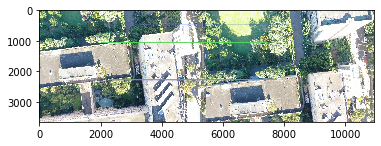

In [2]:
# coding: utf-8
from matplotlib import pyplot as plt
import cv2 as cv

img1 = cv.imread('DJI_0083.JPG')
img2 = cv.imread('DJI_0084.JPG')
print('#### 1')

# gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
# gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

gray1 = img1
gray2 = img2
print('#### 2')

sift = cv.xfeatures2d.SIFT_create(100)

print('#### 3')

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray1, None)
print('#### type 1: ', type(des1))
print('#### type 2: ', type(des2))
print('#### 4')

img1 = cv.drawKeypoints(gray1, kp1, img1)
img2 = cv.drawKeypoints(gray2, kp2, img2)

print('#### 5')

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
print('matches', len(matches))
print('#### 6')

good = [[m] for m, n in matches if m.distance < 0.5 * n.distance]

print('good', len(good))
print('#### 7')

img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
print('#### 8')

# cv.imshow('img', img3)
# cv.waitKey()
(r, g, b) = cv.split(img3)
img4 = cv.merge([b, g, r])
print('#### 9')

plt.imshow(img4)
plt.show()